In [1]:
import numpy as np
import random
x=[3,1,2]
p=[0.1,0.3,0.4]
E_x=np.sum(np.multiply(x,p))
print(E_x)

1.4000000000000001


In [2]:
x=np.random.randn(10)
np.var(x)

1.0971862971289892

In [3]:
x=np.random.random((3,3))
np.cov(x)

array([[ 0.03054093,  0.04185484, -0.01267711],
       [ 0.04185484,  0.06636217, -0.03254832],
       [-0.01267711, -0.03254832,  0.03084251]])

(array([ 1.,  1.,  7., 11., 24., 25., 16.,  9.,  5.,  1.]),
 array([5.22786288, 5.28025179, 5.33264071, 5.38502963, 5.43741855,
        5.48980747, 5.54219639, 5.5945853 , 5.64697422, 5.69936314,
        5.75175206]),
 <a list of 10 Patch objects>)

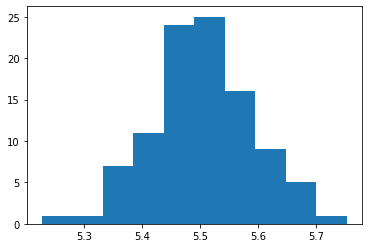

In [4]:
import matplotlib.pyplot as plt
import random
a=np.zeros((100,))
for i in range(100):
    x=[random.uniform(1,10) for _ in range(1000)]
    a[i]=np.sum(x,axis=0)/1000
plt.hist(a)

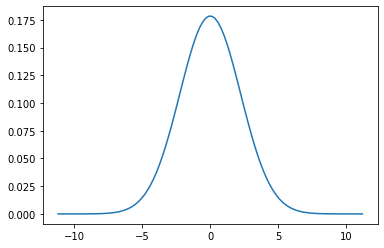

In [5]:
import matplotlib.mlab as mlab
import math
import scipy.stats

mu = 0
variance = 5
sigma = math.sqrt(variance)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
plt.plot(x,scipy.stats.norm.pdf(x, mu, sigma))
plt.show()

New mean is at:  5.0
New variance is:  1.0


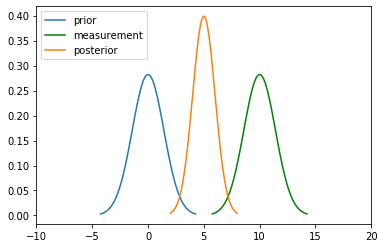

In [6]:
import matplotlib.mlab as mlab
import math
mu1 = 0
variance1 = 2
sigma = math.sqrt(variance1)
x1 = np.linspace(mu1 - 3*sigma, mu1 + 3*sigma, 100)
plt.plot(x1,scipy.stats.norm.pdf(x1, mu1, sigma),label='prior')

mu2 = 10
variance2 = 2
sigma = math.sqrt(variance2)
x2 = np.linspace(mu2 - 3*sigma, mu2 + 3*sigma, 100)
plt.plot(x2,scipy.stats.norm.pdf(x2, mu2, sigma),"g-",label='measurement')


mu_new=(mu1*variance2+mu2*variance1)/(variance1+variance2)
print("New mean is at: ",mu_new)
var_new=(variance1*variance2)/(variance1+variance2)
print("New variance is: ",var_new)
sigma = math.sqrt(var_new)
x3 = np.linspace(mu_new - 3*sigma, mu_new + 3*sigma, 100)
plt.plot(x3,scipy.stats.norm.pdf(x3, mu_new, var_new),label="posterior")
plt.legend(loc='upper left')
plt.xlim(-10,20)
plt.show()

New mean is at:  15
New variance is:  2


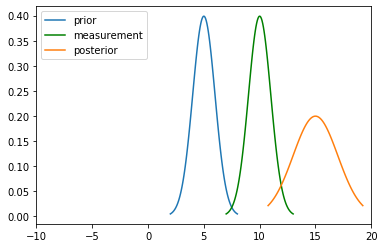

In [7]:
import matplotlib.mlab as mlab
import math
mu1 = 5
variance1 = 1
sigma = math.sqrt(variance1)
x1 = np.linspace(mu1 - 3*sigma, mu1 + 3*sigma, 100)
plt.plot(x1,scipy.stats.norm.pdf(x1, mu1, sigma),label='prior')

mu2 = 10
variance2 = 1
sigma = math.sqrt(variance2)
x2 = np.linspace(mu2 - 3*sigma, mu2 + 3*sigma, 100)
plt.plot(x2,scipy.stats.norm.pdf(x2, mu2, sigma),"g-",label='measurement')


mu_new=mu1+mu2
print("New mean is at: ",mu_new)
var_new=(variance1+variance2)
print("New variance is: ",var_new)
sigma = math.sqrt(var_new)
x3 = np.linspace(mu_new - 3*sigma, mu_new + 3*sigma, 100)
plt.plot(x3,scipy.stats.norm.pdf(x3, mu_new, var_new),label="posterior")
plt.legend(loc='upper left')
plt.xlim(-10,20)
plt.show()

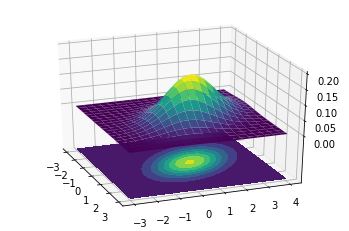

In [8]:
#Example from:
#https://scipython.com/blog/visualizing-the-bivariate-gaussian-distribution/
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Our 2-dimensional distribution will be over variables X and Y
N = 60
X = np.linspace(-3, 3, N)
Y = np.linspace(-3, 4, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 1.])
Sigma = np.array([[ 1. , -0.5], [-0.5,  1.5]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.

    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)

plt.show()